<a href="https://colab.research.google.com/github/Mary7Magdalene/Fungal-Back-acne/blob/main/back_acne_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
back_acne = pd.read_csv("/content/back acne.csv")
back_acne.head(10)

,ID,Age,Gender,Skin_Type,Climate,Exercise_Frequency,Sweating Level,Use_of_Tight_Clothing,Skin_Care_Routine,Hygiene,Diet,Recent_Medications,History_of_fungal_infections,Stress_Level,Fungal_Back_ance
0,1,23,Female,Oily,Hot-Humid,4-5-times,High,Yes,Minimal,no-exfoliation,High-sugar-intake,NaN,Yes,High,Yes
1,2,30,Male,Combination,Mild,2-3-times,Moderate,No,Regular,exfoliate-weekly,Balanced-Diet,Antibiotics for acne,No,Medium,No
2,3,27,Female,Dry,Cold-Dry,1-2-times,Low,No,Frequent moisturiz,use-hydrating-products,Low-sugar,NaN,No,Low,No
3,4,34,Male,Oily,Hot-Humid,6-7-times,Very High,Yes,Minimal,no-exfoliation,High-fat-intake,NaN,Yes,High,Yes
4,5,22,Female,Normal,Mild,4-5-times,Moderate,Yes,Regular,gentle-exfoliation,Mostly-Plant-Based,Birth Control pill,No,Medium,Yes
5,6,29,Male,Oily,Hot-Humid,3-4-times,High,Yes,Regular,no-exfoliation,High-Balanced-diet,NaN,Yes,High,Yes
6,7,31,Female,Sensitive,Mild,1-2-times,Low,No,Mild cleansing,use-gentle-soap,Low-Carb,NaN,No,Low,No
7,8,25,Male,Oily,Hot-Humid,5-6-times,Very High,Yes,Minimal,no-exfoliation,High-sugar-intake,NaN,Yes,High,Yes
8,9,28,Female,Combination,Mild,2-3-times,Moderate,Yes,Regular,exfoliate-weekly,Moderate-Balanced-diet,NaN,No,Medium,Yes
9,10,24,Male,Oily,Hot-Humid,7 times,Very High,Yes,Minimal,no-exfoliation,High-carb-intake,NaN,Yes,High,Yes


In [ ]:
#checking for missing values
back_acne.isnull().sum()

,0
ID,0
Age,0
Gender,0
Skin_Type,0
Climate,0
Exercise_Frequency,0
Sweating Level,0
Use_of_Tight_Clothing,0
Skin_Care_Routine,0
Hygiene,0


In [ ]:
#replacing all the null values in the "medication" column with "no_previous_medication"
back_acne.fillna("no-previous-medication",inplace = True)

In [ ]:
#dropping the unnecessary columns
back_acne.drop("ID", axis = 1,inplace = True)

In [ ]:
print(back_acne.columns)

Index(['Age', 'Gender', 'Skin_Type', 'Climate', 'Exercise_Frequency',
       'Sweating Level', 'Use_of_Tight_Clothing', 'Skin_Care_Routine',
       ' Hygiene     ', 'Diet', 'Recent_Medications',
       'History_of_fungal_infections', 'Stress_Level', 'Fungal_Back_ance'],
      dtype='object')


In [ ]:
#encoding the categorical columns
encoder = LabelEncoder()
categorical_columns = [ 'Gender', 'Skin_Type', 'Climate', 'Exercise_Frequency',
       'Sweating Level', 'Use_of_Tight_Clothing', 'Skin_Care_Routine',
       ' Hygiene     ', 'Diet', 'Recent_Medications',
       'History_of_fungal_infections', 'Stress_Level', 'Fungal_Back_ance']

# For example, if the column is 'Hygiene Practice' instead of 'Hygiene Practices', change it in the list above
for columns in categorical_columns:
  back_acne[columns]= encoder.fit_transform(back_acne[columns])

#normalizing the continious variables
back_acne['Age']=back_acne[['Age']].apply(lambda x: (x-x.min())/(x.max()- (x.min())))

#display the preprocessed data
back_acne.head(10)


,Age,Gender,Skin_Type,Climate,Exercise_Frequency,Sweating Level,Use_of_Tight_Clothing,Skin_Care_Routine,Hygiene,Diet,Recent_Medications,History_of_fungal_infections,Stress_Level,Fungal_Back_ance
0,0.083333,0,3,1,3,0,1,2,4,4,2,1,0,1
1,0.666667,1,0,2,1,2,0,3,0,0,0,0,2,0
2,0.416667,0,1,0,0,1,0,0,6,6,2,0,1,0
3,1.000000,1,3,1,5,3,1,2,4,3,2,1,0,1
4,0.000000,0,2,2,3,2,1,3,2,8,1,0,2,1
5,0.583333,1,3,1,2,0,1,3,3,1,2,1,0,1
6,0.750000,0,4,2,0,1,0,1,5,5,2,0,1,0
7,0.250000,1,3,1,4,3,1,2,3,4,2,1,0,1
8,0.500000,0,0,2,1,2,1,3,1,7,2,0,2,1
9,0.166667,1,3,1,6,3,1,2,3,2,2,1,0,1


Conclusions from the heat map
1. Identifying Strong Correlations
The darker red areas represent higher positive correlations (closer to 1).

The darker blue areas represent negative correlations (closer to -1 or 0).

The light blue to white shades indicate weaker correlations.

2. Key Observations from the Heatmap
Sweating Level & Fungal Back Acne:

The value in this cell appears relatively higher, meaning increased sweating may contribute significantly to the occurrence of fungal back acne.

Diet & Fungal Back Acne:

A strong red zone in the "Diet" row suggests that diet has a notable influence.

Poor diet might be exacerbating fungal back acne, possibly due to increased sugar or high glycemic foods affecting skin health.

Use of Tight Clothing & Fungal Back Acne:

Some correlation is visible, suggesting that tight clothing (which traps sweat and heat) may play a role in increasing fungal acne risk.

History of Fungal Infections & Fungal Back Acne:

If there's a notable correlation here, it suggests that individuals with a history of fungal infections are more prone to recurring back acne issues.

Hygiene & Fungal Back Acne:

If the value is lower or near zero, it may indicate hygiene alone is not a primary driver but rather a contributing factor.

3. Additional Insights
Exercise Frequency & Sweating Level:

If exercise frequency correlates highly with sweating level, but sweating level correlates with fungal acne, it implies exercise-induced sweating could be a risk factor.

Stress & Fungal Back Acne:

If stress shows a correlation, it could indicate that stress-induced hormone fluctuations play a role in acne occurrence.

In [ ]:
#extracting labels and features from tha dataset
X = back_acne.drop('Fungal_Back_ance', axis = 1)
y = back_acne['Fungal_Back_ance']
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
print(y)

[[-1.18308799 -1.          0.60302269 -0.46852129  0.2548236  -1.54545455
   0.65465367 -0.10599979  0.52941176  0.          0.46852129  1.
  -0.91766294]
 [ 0.7428692   1.         -1.6583124   1.09321633 -0.76447079  0.27272727
  -1.52752523  0.95399809 -1.82352941 -1.63299316 -2.65495395 -1.
   1.3764944 ]
 [-0.08254102 -1.         -0.90453403 -2.0302589  -1.27411798 -0.63636364
  -1.52752523 -2.22599555  1.70588235  0.81649658  0.46852129 -1.
   0.22941573]
 [ 1.84341618  1.          0.60302269 -0.46852129  1.27411798  1.18181818
   0.65465367 -0.10599979  0.52941176 -0.40824829  0.46852129  1.
  -0.91766294]
 [-1.45822474 -1.         -0.15075567  1.09321633  0.2548236   0.27272727
   0.65465367  0.95399809 -0.64705882  1.63299316 -1.09321633 -1.
   1.3764944 ]
 [ 0.46773246  1.          0.60302269 -0.46852129 -0.2548236  -1.54545455
   0.65465367  0.95399809 -0.05882353 -1.22474487  0.46852129  1.
  -0.91766294]
 [ 1.01800595 -1.          1.35680105  1.09321633 -1.27411798 -0.63636

In [158]:
#checking for the correlation between diffrent independent features
correlation_marix = back_acne.corr()
print(correlation_marix)


                                   Age    Gender  Skin_Type   Climate  \
Age                           1.000000  0.302650  -0.012444  0.090235   
Gender                        0.302650  1.000000   0.150756 -0.156174   
Skin_Type                    -0.012444  0.150756   1.000000 -0.188353   
Climate                       0.090235 -0.156174  -0.188353  1.000000   
Exercise_Frequency           -0.245390  0.560612   0.422577 -0.198984   
Sweating Level                0.072536  0.454545  -0.095935  0.127779   
Use_of_Tight_Clothing        -0.366243  0.218218   0.263181 -0.034080   
Skin_Care_Routine            -0.096243  0.317999  -0.255681  0.612512   
 Hygiene                      0.076067 -0.294118   0.567551 -0.670629   
Diet                         -0.359437 -0.816497  -0.123091  0.127515   
Recent_Medications           -0.004297 -0.156174   0.541514 -0.512195   
History_of_fungal_infections -0.082541  0.600000   0.603023 -0.468521   
Stress_Level                 -0.012624 -0.458831  -

In [ ]:
#splitting the data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

A heatmap helps in understanding the correlation between various factors and their weight of their contribution to the development of the fungal back acne

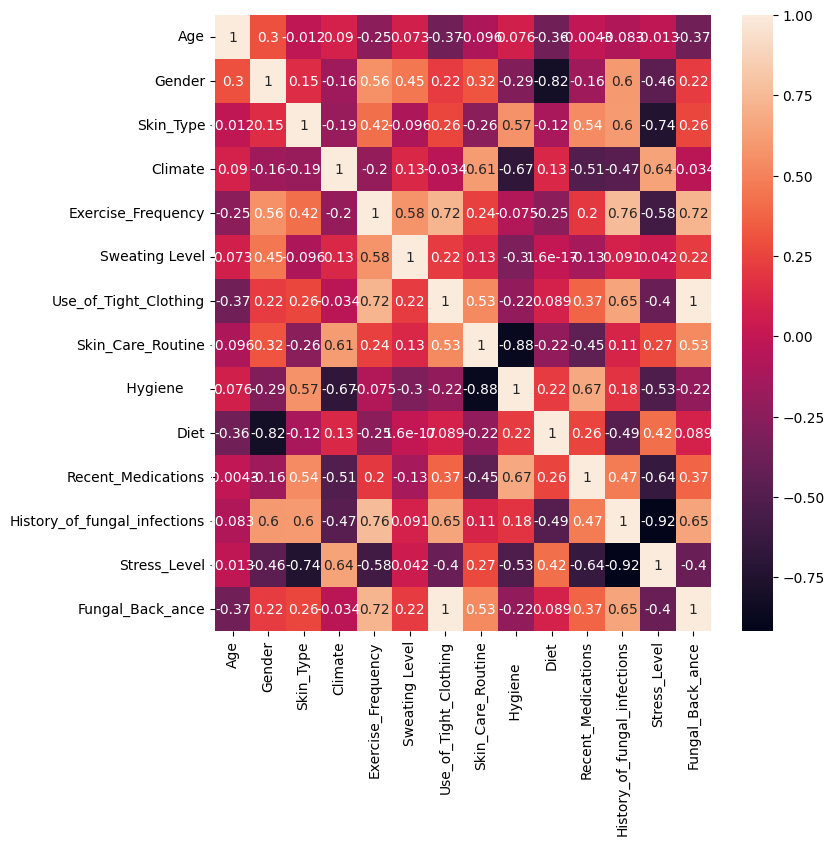

In [160]:
import seaborn as sns
sns.heatmap(back_acne.corr(),annot=True)
 #---get a reference to the current figure and set its size--
fig = plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
#fitting the model to the training data
model = RandomForestClassifier(n_estimators =50, random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#classificarion report
#precision
#recall
#f1-score
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


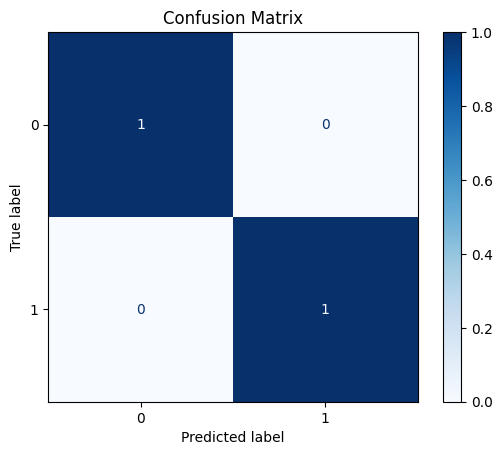

In [ ]:
#bulding a confusion matrix
cm = confusion_matrix(y_test, y_pred)
#create a confusion matrix display
dist = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])
dist.plot(cmap =plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#making predictions based on first data
input_data =X[0,:]
input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[1]


In [ ]:
if prediction == 1:
  print("The patient has Fungal Back Acne")
else:
  print("The patient does not have Fungal Back Acne")

The patient has Fungal Back Acne


Packaging of the model used in the predictio of the occurrence of fungal back acne

In [ ]:
import pickle

In [ ]:
#saving the trained model using pickle
filename = 'TrainedBA_model.pkl'
pickle.dump(model, open(filename,'wb'))

In [ ]:
import numpy as np
input_data = X[0,:]
input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


In [ ]:
if prediction ==0:
    print('The patient does not have fungal back acne')
else:
    print('The patient has fungal back acne')

The patient has fungal back acne
